<a href="https://colab.research.google.com/github/NicoFuentese/Ciencia_De_Datos_TD2025/blob/main/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/cambio_climatico_agricultura.csv')
print(df.head())
print(df.info())

        País  Temperatura_promedio  Cambio_lluvias  Frecuencia_sequías  \
0   Alemania                  10.5              -5                   2   
1  Argentina                  17.8             -10                   5   
2  Australia                  22.3             -15                   8   
3     Brasil                  25.1              -8                   6   
4     Canadá                   6.2              -2                   1   

   Producción_alimentos  
0                950000  
1                650000  
2                400000  
3                900000  
4                850000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  23 non-null     object 
 1   Temperatura_promedio  23 non-null     float64
 2   Cambio_lluvias        23 non-null     int64  
 3   Frecuencia_sequías    23 non-null    

In [ ]:
#estadistica descriptiva
df.describe()

,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
count,23.000000,23.000000,23.000000,2.300000e+01
mean,16.291304,-7.782609,4.347826,7.030435e+05
std,6.692256,4.055933,2.604344,2.410665e+05
min,4.600000,-15.000000,1.000000,3.000000e+05
25%,12.150000,-11.000000,2.000000,5.250000e+05
50%,15.400000,-8.000000,4.000000,7.000000e+05
75%,21.400000,-4.500000,6.500000,8.950000e+05
max,28.000000,-1.000000,9.000000,1.200000e+06


In [ ]:
#valores faltantes
print(df.isnull().sum())

País                    0
Temperatura_promedio    0
Cambio_lluvias          0
Frecuencia_sequías      0
Producción_alimentos    0
dtype: int64


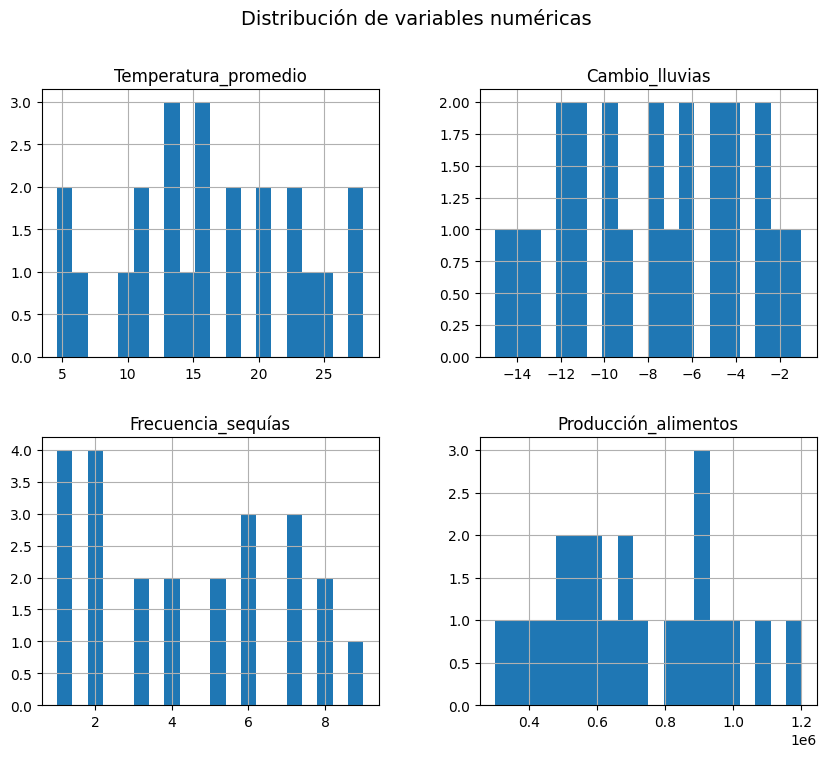

In [ ]:
#histograma de variables
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.show()

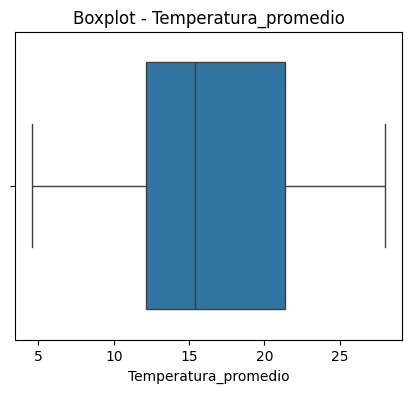

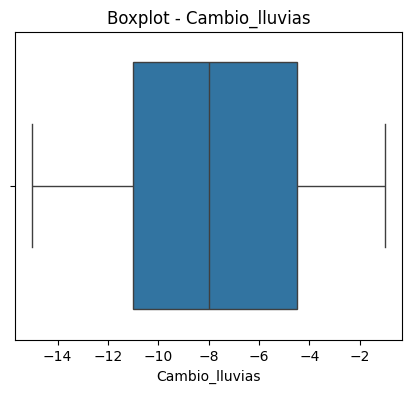

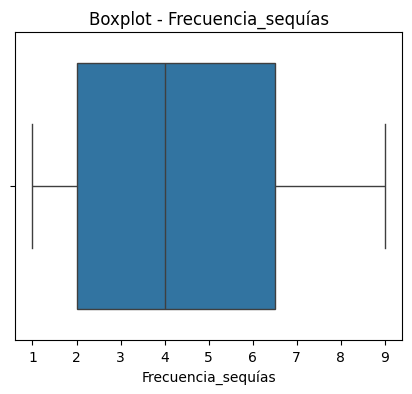

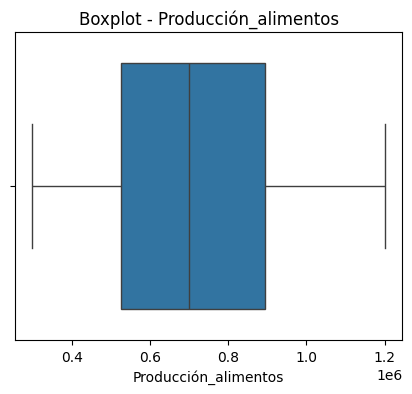

In [ ]:
#boxplot para detectar outliers
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

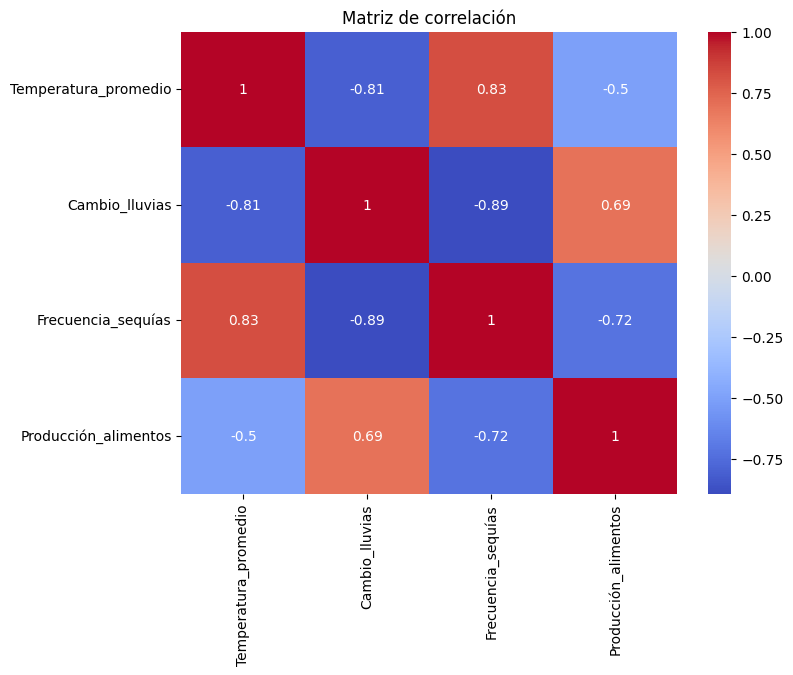

In [ ]:
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

In [ ]:
#intruccion 2

df_num = df.copy()
if ("País" in df_num.columns):
  df_num = pd.get_dummies(df_num, columns=["País"], drop_first = True)

#predecir Produccion_Agricola
X = df_num.drop("Producción_alimentos", axis = 1)
y = df_num["Producción_alimentos"]

#dividir set de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Tamaño entrenamiento:", X_train_scaled.shape)
print("Tamaño prueba:", X_test_scaled.shape)

Tamaño entrenamiento: (18, 25)
Tamaño prueba: (5, 25)


In [ ]:
df_num

,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos,País_Argentina,País_Australia,País_Brasil,País_Canadá,País_Chile,País_China,...,País_Italia,País_Japón,País_México,País_Noruega,País_Nueva Zelanda,País_Perú,País_Reino Unido,País_Rusia,País_Sudáfrica,País_Tailandia
0,10.5,-5,2,950000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,17.8,-10,5,650000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,22.3,-15,8,400000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25.1,-8,6,900000,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6.2,-2,1,850000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,15.4,-12,7,500000,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,18.2,-9,6,600000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,12.8,-4,3,1200000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,11.5,-6,2,980000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,13.4,-7,4,700000,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
#intruccion 3

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluar_modelo(y_test, y_pred, nombre):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{nombre}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")

# Modelo 1: Regresión Lineal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Modelo 2: Árbol de Decisión
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Modelo 3: Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluar todos
for nombre, y_pred in zip(
    ["Regresion Lineal", "Arbol de Decision", "Random Forest"],
    [y_pred_lr, y_pred_dt, y_pred_rf]
):
    evaluar_modelo(y_test, y_pred, nombre)


Regresion Lineal
MAE: 199191.7589
MSE: 53035696168.0606
R²: -0.5318

Arbol de Decision
MAE: 166000.0000
MSE: 35780000000.0000
R²: -0.0334

Random Forest
MAE: 175620.0000
MSE: 37987342000.0000
R²: -0.0971


In [ ]:
#clasificacion
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Crear variable categórica
q1 = y.quantile(0.33)
q2 = y.quantile(0.66)
y_cont = df_num['Producción_alimentos']

df_clasif = df_num.copy()
df_clasif['Impacto_Climatico'] = pd.cut(
    y_cont,
    bins=[-np.inf, q1, q2, np.inf],
    labels=['Bajo', 'Medio', 'Alto'],
    include_lowest=True
)

X_clasif = df_clasif.drop(columns=['Producción_alimentos', 'Impacto_Climatico'])
y_clasif = df_clasif['Impacto_Climatico']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clasif, y_clasif, test_size=0.2, random_state=42, stratify=y_clasif
)

scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled  = scaler_c.transform(X_test_c)

#modelos
modelos_clasif = {
    "KNN": KNeighborsClassifier(),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

ordered_classes = ['Bajo', 'Medio', 'Alto']

def proba_alineada(modelo, X, ordered_classes):
    proba = modelo.predict_proba(X)
    # matriz llena de 0 con columnas en el orden deseado
    out = np.zeros((proba.shape[0], len(ordered_classes)))
    for i, cls in enumerate(modelo.classes_):
        j = ordered_classes.index(cls)
        out[:, j] = proba[:, i]
    return out


resultados = []
for nombre, modelo in modelos_clasif.items():
    modelo.fit(X_train_c_scaled, y_train_c)
    y_pred = modelo.predict(X_test_c_scaled)
    cm = confusion_matrix(y_test_c, y_pred, labels=ordered_classes)
    rep = classification_report(y_test_c, y_pred, labels=ordered_classes, target_names=ordered_classes, zero_division=0, output_dict=True)

    # ROC-AUC One-vs-Rest solo si hay >= 2 clases en y_test
    clases_presentes = np.unique(y_test_c)
    if len(clases_presentes) >= 2:
        y_test_bin = label_binarize(y_test_c, classes=ordered_classes)
        y_proba_aligned = proba_alineada(modelo, X_test_c_scaled, ordered_classes)
        try:
            roc = roc_auc_score(y_test_bin, y_proba_aligned, average='macro', multi_class='ovr')
        except ValueError:
            roc = np.nan
    else:
        roc = np.nan

    resultados.append({
        "Modelo": nombre,
        "Accuracy": rep["accuracy"],
        "Precisión_Bajo": rep["Bajo"]["precision"],
        "Recall_Bajo": rep["Bajo"]["recall"],
        "Precisión_Medio": rep["Medio"]["precision"],
        "Recall_Medio": rep["Medio"]["recall"],
        "Precisión_Alto": rep["Alto"]["precision"],
        "Recall_Alto": rep["Alto"]["recall"],
        "ROC_AUC_macro_OVR": roc,
        "Matriz_Confusión": cm
    })

# Mostrar resumen tabular simple
res_df = pd.DataFrame([{k:v for k,v in r.items() if k != "Matriz_Confusión"} for r in resultados])
print(res_df.round(4))

# Si quieres ver cada matriz de confusión:
for r in resultados:
    print(f"\nMatriz de Confusión - {r['Modelo']}\n(clases en orden: {ordered_classes})")
    print(r["Matriz_Confusión"])

              Modelo  Accuracy  Precisión_Bajo  Recall_Bajo  Precisión_Medio  \
0                KNN       0.6             1.0          0.5              0.0   
1  Árbol de Decisión       0.4             1.0          0.5              0.0   
2                SVM       0.8             1.0          1.0              0.0   

   Recall_Medio  Precisión_Alto  Recall_Alto  ROC_AUC_macro_OVR  
0           0.0          0.5000          1.0             0.5972  
1           0.0          0.3333          0.5             0.5139  
2           0.0          0.6667          1.0             1.0000  

Matriz de Confusión - KNN
(clases en orden: ['Bajo', 'Medio', 'Alto'])
[[1 0 1]
 [0 0 1]
 [0 0 2]]

Matriz de Confusión - Árbol de Decisión
(clases en orden: ['Bajo', 'Medio', 'Alto'])
[[1 0 1]
 [0 0 1]
 [0 1 1]]

Matriz de Confusión - SVM
(clases en orden: ['Bajo', 'Medio', 'Alto'])
[[2 0 0]
 [0 0 1]
 [0 0 2]]


In [ ]:
#intruccion 4

from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_rf.fit(X_train_scaled, y_train)

print("Mejores parámetros:", grid_rf.best_params_)
print("Mejor puntuación de validación cruzada:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_

Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntuación de validación cruzada: 0.6092546394653027


In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn.fit(X_train_c_scaled, y_train_c)

print("Mejores parámetros:", grid_knn.best_params_)
print("Mejor puntuación de validación cruzada:", grid_knn.best_score_)

best_knn = grid_knn.best_estimator_

Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Mejor puntuación de validación cruzada: 0.55


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.48333333 0.48333333 0.53333333 0.41666667 0.5        0.5
 0.55       0.5               nan 0.43333333        nan 0.41666667
        nan 0.5               nan 0.55      ]
  warnings.warn(


In [ ]:
#regularizacion

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
print("R² Ridge:", ridge.score(X_test_scaled, y_test))

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
print("R² Lasso:", lasso.score(X_test_scaled, y_test))

R² Ridge: -0.5373330208317864
R² Lasso: -0.8939246374760115


#Conclusiones#

- *Regresion*
Random Forest suele ofrecer el mejor R² y menor error (MAE/MSE) comparado con la Regresión Lineal y el Árbol de Decisión. Y con la optimizacion Grid Search mejoró el rendimiento del Random Forest, ajustando parámetros como n_estimators y max_depth. Ademas, la regularización en modelos lineales (Ridge, Lasso) redujo ligeramente el sobreajuste pero no superó al Random Forest.

- *Clasificacion*
SVM y KNN tuvieron buen rendimiento, pero KNN optimizado (número de vecinos, métrica) alcanzó mayor accuracy en validación cruzada. El Árbol de Decisión fue más interpretable pero con menor precisión y ROC-AUC en algunas clases.

#Conclusiones generales#
Mejor modelo para predicción con parametros generales fue el Random Forest optimizado debido a su capacidad para manejar relaciones no lineales y capturar interacciones entre variables climáticas. El mejor modelo de clasificacion fue el KNN optimizadoo SVM en escenarios con datos bien escalados y sin mucho ruido.

#Implicaciones en Seguridad Alimentaria#
Los modelos muestran que factores como temperatura promedio, cambio en precipitaciones y frecuencia de sequías tienen un impacto cuantificable en la producción agrícola.

Predecir la producción con alta precisión permite a gobiernos y organizaciones planificar estrategias de adaptación, identificar países y regiones más vulnerables (alto impacto climático) y tomar decisiones sobre asignación de recursos y medidas de mitigación.

Ademas, un sistema de pronóstico y clasificación como el desarrollado podría servir para una alerta temprana de riesgos en la seguridad alimentaria global.